In [8]:
from demosearch import FileCache
from pathlib import Path
from itertools import islice
import pandas as pd 
import geopandas as gpd

from shapely import wkt

from tqdm.notebook import tqdm
tqdm.pandas()


In [2]:
%%time
cp = Path.cwd().parent.joinpath('data','cache')
cache = FileCache(cp)
keys = list(cache.glob('recombine','**/*'))

print(cp, len(keys))
t = pd.concat([pd.read_pickle(e) for e in tqdm(keys) ])
t.to_csv('lines.csv')

/Users/eric/proj/code-projects/radius-search/staging/civicknowledge.com-osm-demosearch/data/cache 128


  0%|          | 0/128 [00:00<?, ?it/s]

CPU times: user 1min 50s, sys: 2.09 s, total: 1min 53s
Wall time: 1min 53s


In [5]:
%%time
t = pd.read_csv('lines.csv')


CPU times: user 9.43 s, sys: 592 ms, total: 10 s
Wall time: 10 s


In [6]:
len(t)

2358875

In [9]:
%time geometry = t.geometry.apply(wkt.loads)

CPU times: user 34.6 s, sys: 403 ms, total: 35 s
Wall time: 35.1 s


In [10]:
t['geometry'] = geometry
t = gpd.GeoDataFrame(t, crs=4326)

<AxesSubplot:>

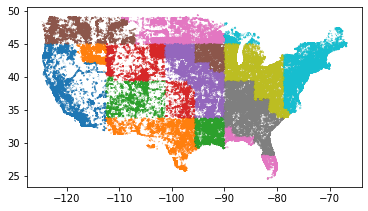

In [12]:
t.plot(column='geohash')